In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Activation, Dense
from keras.metrics import Accuracy

In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.01/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)

In [3]:
df = pd.read_json(json.dumps(register))

In [4]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


In [5]:
# df.gyroy = df.gyroy.astype(float)
# df.kalangley = df.kalangley.astype(float)
# df.kd = df.kd.astype(float)
# df.ki = df.ki.astype(float)
# df.kp = df.kp.astype(float)
# df.pitch = df.pitch.astype(float)
# df.res = df.res.astype(float)

In [6]:
df.shape

(1575, 7)

In [7]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


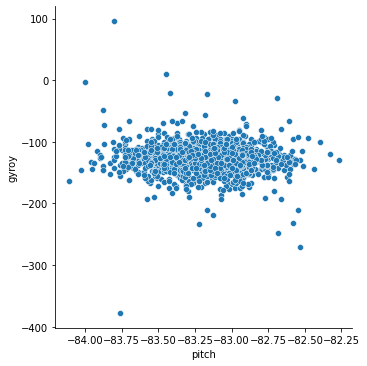

In [8]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

In [9]:
for x in range(len(df)):
    if -150 < df["gyroy"][x] < -100:
        df.loc[x, "up"] = 1
    else:
        df.loc[x, "up"] = 0

In [10]:
df.sample(10)

,gyroy,kalangley,kd,ki,kp,pitch,res,up
483,-145,-83.25,1,5,22,-82.81,200,1.0
1235,-141,-83.20,1,5,22,-83.17,200,1.0
660,-125,-83.16,1,5,22,-83.34,200,1.0
452,-124,-83.18,1,5,22,-83.00,200,1.0
1462,-98,-83.15,1,5,22,-83.26,200,0.0
359,-124,-83.22,1,5,22,-83.19,200,1.0
1440,-133,-83.13,1,5,22,-83.07,200,1.0
185,-156,-83.21,1,5,22,-83.76,200,0.0
1066,-134,-83.20,1,5,22,-83.54,200,1.0
1508,-123,-83.21,1,5,22,-83.46,200,1.0


In [11]:
#df.to_csv("teste.csv", index=False)

In [12]:
features = df.iloc[:,0:7]
target = df.iloc[:,7]

In [13]:
target

0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1570    1.0
1571    1.0
1572    1.0
1573    1.0
1574    1.0
Name: up, Length: 1575, dtype: float64

In [14]:
features

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200
...,...,...,...,...,...,...,...
1570,-113,-83.21,1,5,22,-83.55,200
1571,-143,-83.21,1,5,22,-83.00,200
1572,-110,-83.20,1,5,22,-83.12,200
1573,-142,-83.21,1,5,22,-83.32,200


In [15]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [16]:
X_train.shape

(1055,)

In [17]:
#import tensorflow as tf

In [18]:
# modelo = Sequential([tf.keras.layers.Input(shape=(7,)),
#                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
modelo = Sequential()
modelo.add(Dense(12, input_dim=7, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [19]:
#modelo.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
historico = modelo.fit(y_train, X_train, epochs=100)

Epoch 1/100
33/33 [==============================] - 0s 1ms/step - loss: 1.2400 - accuracy: 0.7185
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.8190
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8095
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.8133
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8123
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8237
Epoch 7/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8161
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8180
Epoch 9/100
33/33 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8227
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8275
Epoch 11/

In [21]:
modelo.test_on_batch(y_train, X_train)
modelo.metrics_names

['loss', 'accuracy']

In [22]:
print(historico.history.keys())

dict_keys(['loss', 'accuracy'])


In [23]:
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 895us/step - loss: 0.0808 - accuracy: 0.9538


Acuracia do modelo

accuracy: 95.384616%


In [24]:
prediction = modelo.predict([[-74, -64, -51, -19, -11, 11, 23]])
print("prediction shape:", prediction)

prediction shape: [[0.999979]]


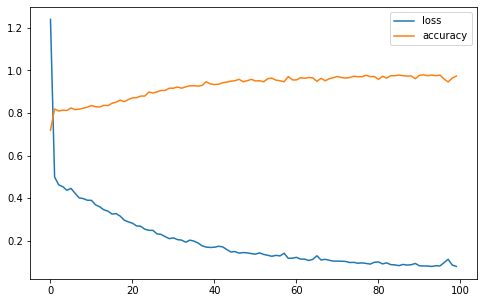

In [25]:
from matplotlib import pyplot as plt
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.show()

In [26]:
from random import sample

aux = 0
while (aux <= 100):
  sorteados = sample(range(-100, 100), 7)
  #print(sorteados)

  prediction = modelo.predict([sorteados])*100

  if prediction >= 0.8:
    print("numeros: ", sorted(sorteados))
    print("prediction shape:", prediction)
    aux += 1

numeros:  [-90, -86, -58, 27, 52, 67, 99]
prediction shape: [[100.]]
numeros:  [-86, -77, -7, 63, 65, 77, 97]
prediction shape: [[99.83393]]
numeros:  [-75, -67, -1, 0, 20, 54, 65]
prediction shape: [[3.0669065]]
numeros:  [-90, -80, 1, 11, 28, 38, 49]
prediction shape: [[99.99457]]
numeros:  [-98, -90, -49, -39, 25, 78, 92]
prediction shape: [[99.99994]]
numeros:  [-77, -51, -41, 6, 8, 15, 21]
prediction shape: [[99.76647]]
numeros:  [-95, -46, -28, -14, -5, 42, 94]
prediction shape: [[99.96345]]
numeros:  [-62, -60, -39, -36, -2, 4, 91]
prediction shape: [[90.41341]]
numeros:  [-97, -84, -82, -59, -54, 22, 42]
prediction shape: [[82.93264]]
numeros:  [-87, -37, -14, 15, 27, 35, 46]
prediction shape: [[17.670668]]
numeros:  [-80, -79, -63, 8, 32, 36, 79]
prediction shape: [[100.]]
numeros:  [-83, -42, -11, 3, 30, 45, 50]
prediction shape: [[99.99788]]
numeros:  [-52, -30, -27, 44, 55, 94, 98]
prediction shape: [[2.1355271]]
numeros:  [-93, -82, -72, -61, -55, -21, 42]
prediction shape